Task 2 was to create a matrix equation which was time evolved according to the task sheet. This was done using arrays as matrices, and numpy for the multiplications required. 

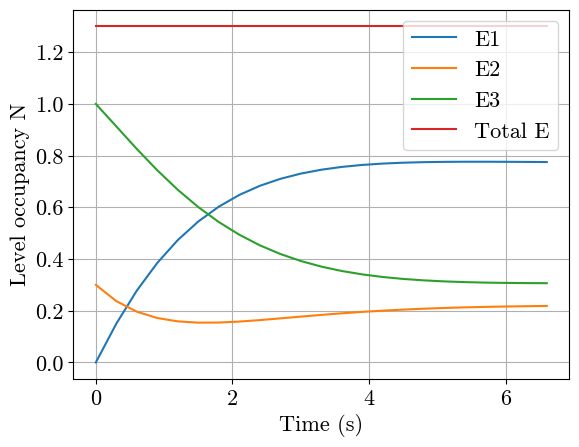

In [1]:
#Project1Task2
import numpy as np
import matplotlib.pyplot as plt
E1 = 0.7 #Energy values
E2 = 0.5
E3 = 1.2

t = np.array([0]) #for ze time
   
w12 = abs(E2-E1) #omega values
w23 = abs(E3-E2)
w13 = abs(E3-E1)
t0=0 #start time
dt=0.3 #delta interval size
T=7 #end time

Nt = int(T/dt) #steps within interval up to T

#Start condition
N01=0
N02=0.3  		#changing the order of the 1s and 0s adjust which energy levels fill first, and change the graph.
N03=1
N = np.array([[N01,N02,N03]]) #Vector of start values for N
N_sum = np.array(N01+N02+N03)
W = np.array([[-w12,0,w13],[w12,-w23,0],[0,w23,-w13],]) #matrix of frequencies for multiplying N

for i in range(1,Nt):
	tempo = N[i-1] + dt * W@N[i-1] #order of @ matmul product changes the max of each line: syntax in this part caused 30 minutes of headaches, fixed in vscode
	N = np.vstack((N, tempo)) #vertical stack of the arrays
	t = np.append(t, t[0] + i*dt) #increment time as N increments
	N_sum = np.append(N_sum, N[i,0]+N[i,1]+N[i,2]) #increments the total energy in the same intervals as the other 3.

plt.rc('font', family = 'serif', serif = 'cmr10',size=16) #to make like latex
plt.plot(t, N, label= ["E1","E2","E3"]) #plots all 3 energy levels simultaneously and labels using an array
plt.plot(t,N_sum, label = "Total E") #plots the total energy and labels
plt.xlabel("Time (s)") #add x axis label
plt.ylabel("Level occupancy N") #add y axis label
plt.legend(loc='upper right') #adds legend
plt.grid() #plots on a grid